# Ridge Regression

Ridge Regression is a regularized version of Linear Regression: a regularization term equal to $\alpha \sum_{i=1}^n \theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

`Regularization` is a technique used in machine learning and statistics to prevent overfitting of models on training data. Overfitting occurs when a model learns the training data too well, including its noise and outliers, leading to poor generalization to new, unseen data. Regularization helps to solve this problem by adding a penalty to the model's complexity.

Ridge regression, also known as Tikhonov regularization, is a type of linear regression that includes a regularization term. The key idea behind ridge regression is to find a new line that doesn't fit the training data as well as ordinary least squares regression, in order to achieve better generalization to new data. This is particularly useful when dealing with multicollinearity (independent variables are highly correlated) or when the number of predictors (features) exceeds the number of observations.

### Key Concept:
- **Regularization**: Ridge regression adds a penalty equal to the square of the magnitude of coefficients. This penalty term (squared L2 norm) shrinks the coefficients towards zero, but it doesn't make them exactly zero.

### Mathematical Representation:
The ridge regression modifies the least squares objective function by adding a penalty term:

$$ \text{Minimize } \sum_{i=1}^{n} (y_i - \sum_{j=1}^{p} x_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $$

where:
- $ y_i $ is the response value for the ith observation.
- $ x_{ij} $ is the value of the jth predictor for the ith observation.
- $ \beta_j $ is the regression coefficient for the jth predictor.
- $ \lambda $ is the tuning parameter that controls the strength of the penalty; $ \lambda \geq 0 $.


In this code, `alpha` is the regularization strength \( \lambda \). Adjusting `alpha` changes the strength of the regularization penalty. A larger `alpha` enforces stronger regularization (leading to smaller coefficients), and a smaller `alpha` tends towards a model similar to linear regression.

### Key Points:
- **Choosing Alpha**: Selecting the right value of `alpha` is crucial. It can be done using cross-validation techniques like `RidgeCV`.
- **Standardization**: It's often recommended to standardize the predictors before applying ridge regression.
- **Bias-Variance Tradeoff**: Ridge regression balances the bias-variance tradeoff in model training.

In [17]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("data/dataset_processed.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,False,False,True,False
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,False,False,True,False
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,False,False,True,False


In [8]:
target_column = 'median_house_value'  # Example: 'SalePrice' or 'Salary'
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, "Testing set:", X_test.shape)

Training set: (16512, 12) Testing set: (4128, 12)


In [18]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso Coefficients:", lasso.coef_)

Lasso MSE: 0.4626318901396913
Lasso Coefficients: [-0.         -0.          0.04335699  0.          0.         -0.
  0.          0.56679392 -0.27091977  0.          0.          0.        ]


In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R² Score: {r2:.4f}")

MSE: 0.3687
RMSE: 0.6072
MAE: 0.4392
MAPE: 1.7479
R² Score: 0.6253


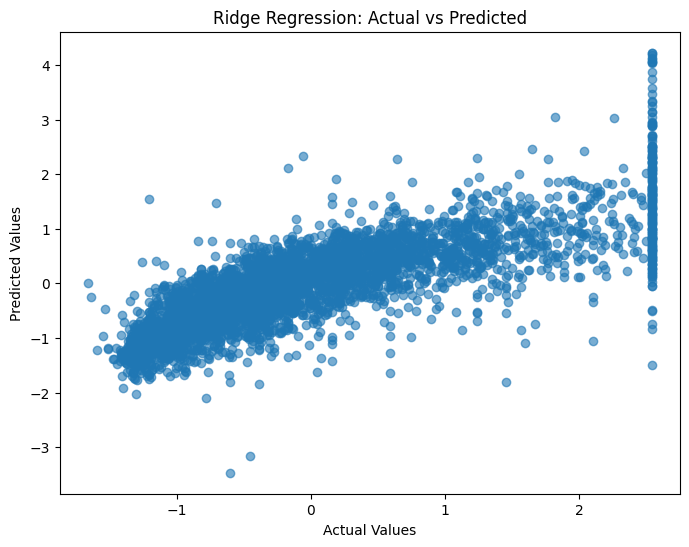

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()
